# Pyber Ride Sharing

In [282]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [283]:
cities = pd.read_csv("city_data.csv")
rides = pd.read_csv("ride_data.csv")
mtable = pd.merge(rides, cities, how='left', on=['city', 'city'])

In [328]:
rides2 = rides[["city", "fare"]]
group = rides2.groupby(["city"])
sums = group.sum().head(125)
fare = sums["fare"]
count = rides2["city"].value_counts()
total = fare / count
rides3 = len(rides)
drivers = cities[["city", "driver_count"]]
ctype = cities[["city", "type"]]
ctype2 = ctype.groupby(["city"])
drivers2 = drivers.groupby(["city"])
drivers3 = drivers2.sum().head(125)
total2 = pd.DataFrame({'Average Fare' : total,
                      'Ride Count' : count})
total2["Average Fare"] = total2["Average Fare"].map('${:.2f}'.format)

urban = mtable[mtable["type"] == "Urban"]
suburban = mtable[mtable["type"] == "Suburban"]
rural = mtable[mtable["type"] == "Rural"]
urban_avg = urban.groupby(["city"]).mean()["fare"]
urban_count = urban.groupby(["city"]).count()["ride_id"]
urban_drivers = urban.groupby(["city"]).mean()["driver_count"]
suburban_avg = suburban.groupby(["city"]).mean()["fare"]
suburban_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_drivers = suburban.groupby(["city"]).mean()["driver_count"]
rural_avg = rural.groupby(["city"]).mean()["fare"]
rural_count = rural.groupby(["city"]).count()["ride_id"]
rural_drivers = rural.groupby(["city"]).mean()["driver_count"]

type_percent = 100 * mtable.groupby(["type"]).sum()["fare"] / all_data["fare"].sum()

ride_percent = 100 * all_data.groupby(["type"]).count()["ride_id"] / all_data["ride_id"].count()

driver_percent = 100 * all_data.groupby(["type"]).sum()["driver_count"] / all_data["driver_count"].sum()
ride_percent

type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: ride_id, dtype: float64

In [334]:
plt.scatter(urban_count, urban_avg,
    s=10*urban_drivers, c="orange",
    edgecolor="black", linewidths=1, marker="o",
    alpha=0.8, label="Urban")
plt.scatter(suburban_count, suburban_avg, 
    s=10*suburban_drivers, c="lightskyblue",
    edgecolor="black", linewidths=1, marker="o",
    alpha=0.8, label="Suburban")
plt.scatter(rural_count, rural_avg,
    s=10*rural_drivers, c="yellow",
    edgecolor="black", linewidths=1, marker="o",
    alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylim((15,55))
plt.xlim((0,40))
plt.grid(True)
lgnd = plt.legend(fontsize="small", mode="Expanded",
        numpoints=1, scatterpoints=1,
        loc="best", title="City Types",
        labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
    
plt.text(42, 35, "Note: Circle size correlates with driver count per city.")



Text(42,35,'Note: Circle size correlates with driver count per city.')

# Bubble Plot of Ride Sharing Data

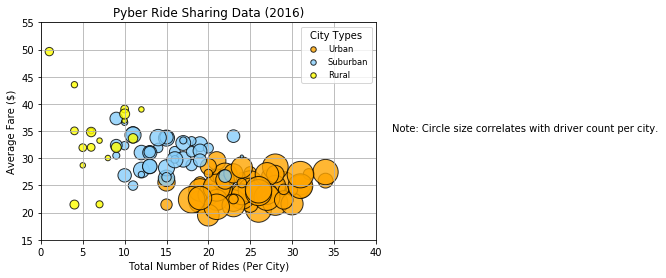

In [335]:
plt.show()

# Total Fares by City Type

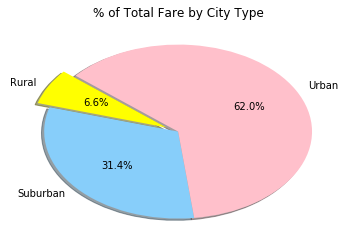

In [325]:
types = ["Rural", "Suburban", "Urban"]

colors = ["yellow", "lightskyblue", "pink"]
explode = (0.1, 0, 0)

plt.pie(type_percent, explode=explode, labels=types, colors=colors,
    autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fare by City Type")
plt.show()

# Total Rides by City Type

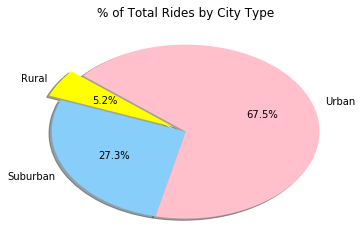

In [327]:
types = ["Rural", "Suburban", "Urban"]

colors = ["yellow", "lightskyblue", "pink"]
explode = (0.1, 0, 0)

plt.pie(ride_percent, explode=explode, labels=types, colors=colors,
    autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

# Total Drivers by City Type

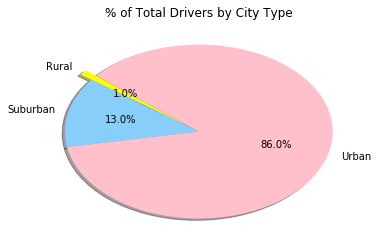

In [331]:
types = ["Rural", "Suburban", "Urban"]
percents = ["77.8", "19.1", "03.1"]
colors = ["yellow", "lightskyblue", "pink"]
explode = (0.1, 0, 0)

plt.pie(driver_percent, explode=explode, labels=types, colors=colors,
    autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()